# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [61]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [62]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

588

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [63]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="
# Build query URL
query_url = f"{url}{weather_api_key}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bbf8730e341cdc5aa04ea1d7403f4cd9&q=


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [64]:
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        weather_response = requests.get(query_url + city).json()
        city_name.append(weather_response['name'])
        lat.append(weather_response['coord']['lat'])
        lng.append(weather_response['coord']['lon'])
        max_temp.append(weather_response['main']['temp_max'])
        humidity.append(weather_response['main']['humidity'])
        cloudiness.append(weather_response['clouds']['all'])
        wind_speed.append(weather_response['wind']['speed'])
        country.append(weather_response['sys']['country'])
        date.append(weather_response['dt'])
        print(f"Processing Record for {city}")
    except KeyError:
        print("City not valid")
print("All cities processed")

Processing Record for nanakuli
Processing Record for kaitangata
Processing Record for kutum
Processing Record for albany
Processing Record for port hardy
Processing Record for rikitea
Processing Record for upernavik
Processing Record for axim
Processing Record for busselton
Processing Record for lafia
Processing Record for hithadhoo
Processing Record for east london
City not valid
Processing Record for punta arenas
Processing Record for hualmay
Processing Record for bredasdorp
Processing Record for port elizabeth
Processing Record for hermanus
Processing Record for vao
Processing Record for ganta
Processing Record for virginia beach
Processing Record for mataura
Processing Record for chuy
Processing Record for saint-philippe
Processing Record for bandar-e lengeh
Processing Record for lorengau
Processing Record for vaini
Processing Record for vostok
Processing Record for lazurne
Processing Record for hilo
Processing Record for poopo
City not valid
Processing Record for half moon bay
Pro

In [60]:
weather_dict = {
    "City":city_name,
    "Lat":lat,
    "Lng":lng,
    "Max Temp":max_temp,
    "Humidity":humidity,
    "Cloudiness":cloudiness,
    "Wind Speed":wind_speed,
    "Country":country,
    "Date":date
}

weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nouadhibou,20.9310,-17.0347,78.78,69,0,13.80,MR,1627224596
1,Guerrero Negro,27.9769,-114.0611,69.98,77,91,8.68,MX,1627224597
2,Hilo,19.7297,-155.0900,75.79,97,90,5.75,US,1627224400
3,Siniscola,40.5719,9.6922,94.55,39,98,12.68,IT,1627224597
4,Saint-Philippe,-21.3585,55.7679,69.39,78,37,12.10,RE,1627224597


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [65]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
#There are no cities with humidity over 100 percent


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

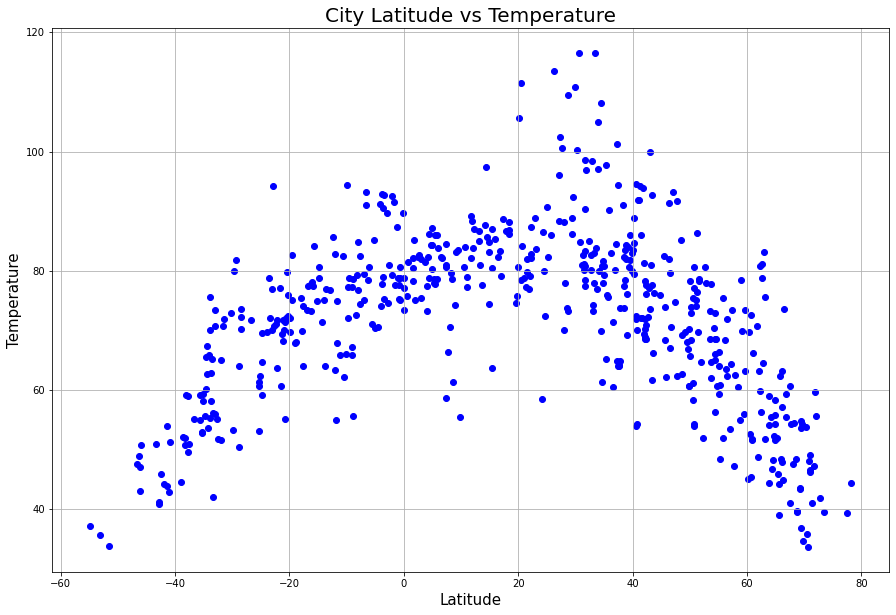

In [81]:
x_axis = weather_df['Lat'] 
temp = weather_df['Max Temp']

fig1, ax1  = plt.subplots(figsize=(15, 10))
markersize=10
plt.title('City Latitude vs Temperature',fontsize =20)
plt.scatter(x_axis, temp , marker="o",color="blue")
plt.xlabel('Latitude',fontsize =15)
plt.ylabel('Temperature',fontsize =15)
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

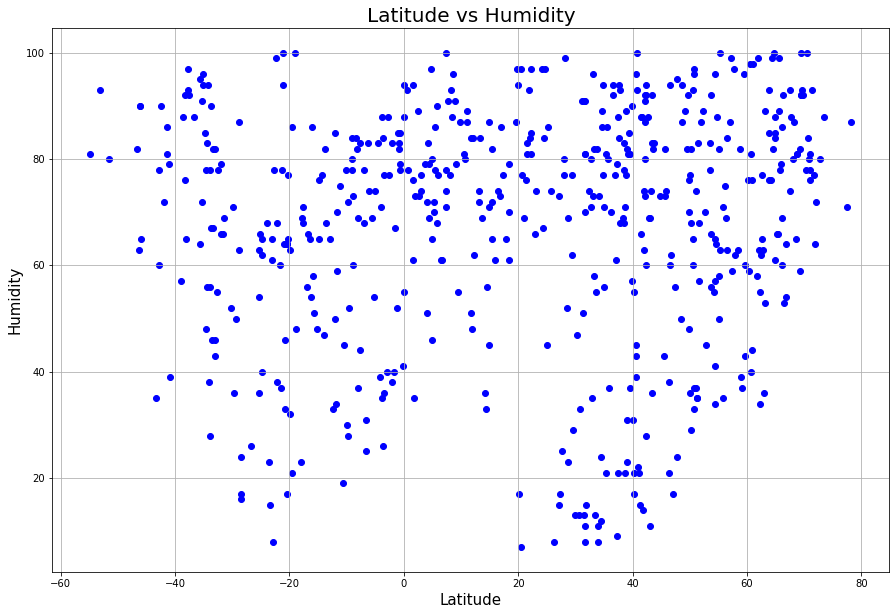

In [83]:
x_axis = weather_df['Lat'] 
hum = weather_df['Humidity']

fig1, ax1  = plt.subplots(figsize=(15, 10))
markersize=10
plt.title('Latitude vs Humidity',fontsize =20)
plt.scatter(x_axis, hum , marker="o",color="blue")
plt.xlabel('Latitude',fontsize =15)
plt.ylabel('Humidity',fontsize =15)
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

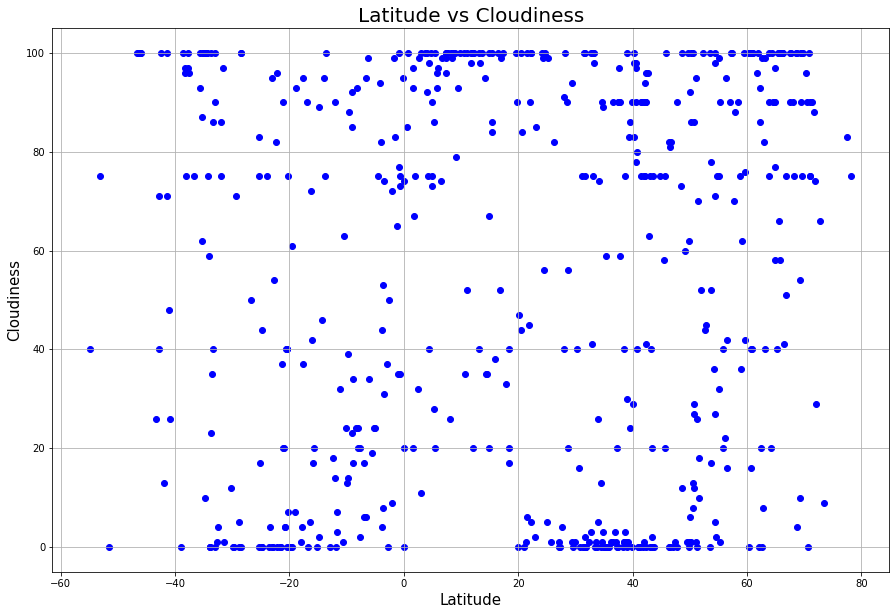

In [84]:
x_axis = weather_df['Lat'] 
cloud = weather_df['Cloudiness']

fig1, ax1  = plt.subplots(figsize=(15, 10))
markersize=10
plt.title('Latitude vs Cloudiness',fontsize =20)
plt.scatter(x_axis, cloud , marker="o",color="blue")
plt.xlabel('Latitude',fontsize =15)
plt.ylabel('Cloudiness',fontsize =15)
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

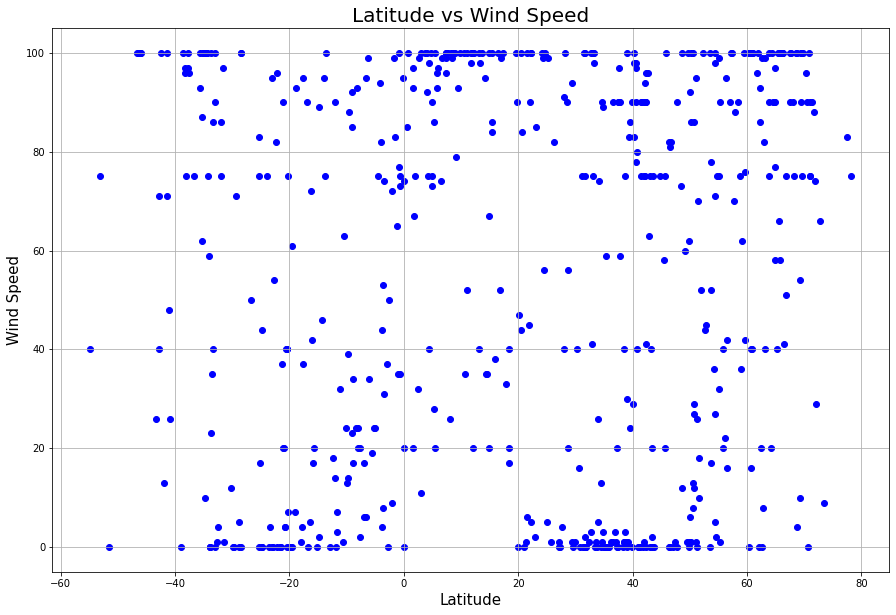

In [85]:
x_axis = weather_df['Lat'] 
wind = weather_df['Wind Speed']

fig1, ax1  = plt.subplots(figsize=(15, 10))
markersize=10
plt.title('Latitude vs Wind Speed',fontsize =20)
plt.scatter(x_axis, cloud , marker="o",color="blue")
plt.xlabel('Latitude',fontsize =15)
plt.ylabel('Wind Speed',fontsize =15)
plt.grid()
plt.show()

## Linear Regression

In [89]:
nothern = weather_df.loc[weather_df["Lat"] >= 0.0]
nothern.reset_index(inplace=True)

southern = weather_df.loc[weather_df["Lat"] < 0.0]
southern.reset_index(inplace=True)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [92]:
def plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-squared is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
  
    plt.show()

The r-squared is: -0.634956987532882


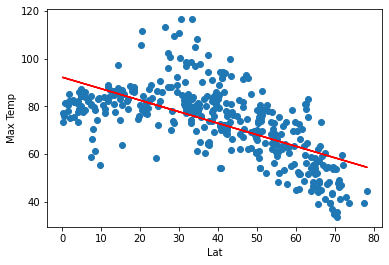

In [93]:
xlbl = "Lat"
ylbl = "Max Temp"
lblpos = (0,25)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos,5)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8011327157480651


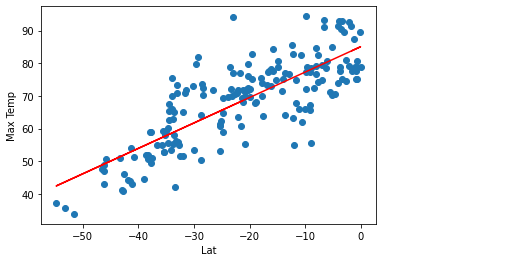

In [94]:
xlbl = "Lat"
ylbl = "Max Temp"
lblpos = (0,25)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,5)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.03441677889462727


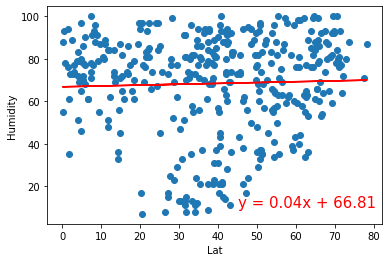

In [95]:
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (45,10)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos,7)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.15119902911247993


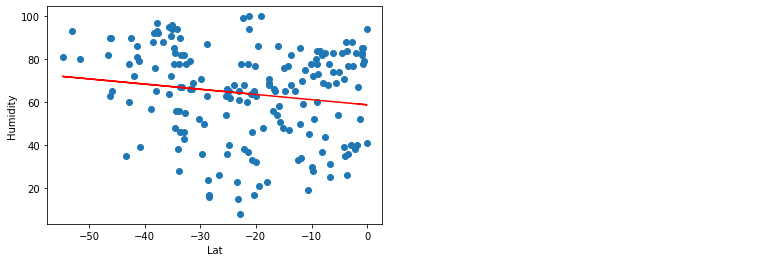

In [96]:
xlbl = "Lat"
ylbl = "Humidity"
lblpos = (45,10)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,7)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.02498023245695947


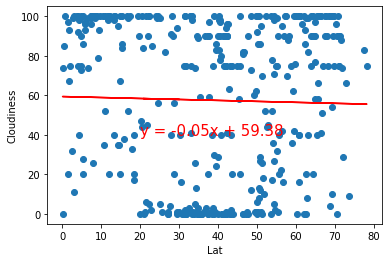

In [97]:
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (20,40)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos,9)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.19105409744137952


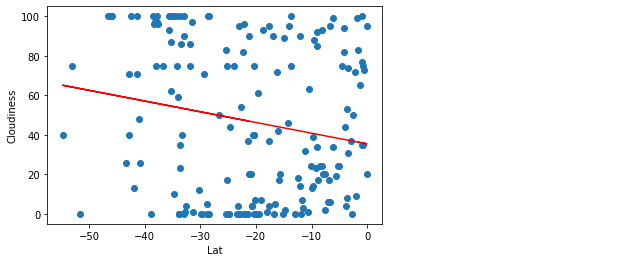

In [98]:
xlbl = "Lat"
ylbl = "Cloudiness"
lblpos = (20,40)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,9)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.04710722384899507


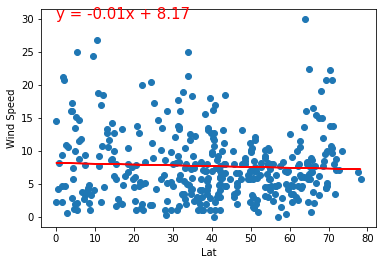

In [99]:
xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (0,30)
plotLinearRegression(nothern[xlbl],nothern[ylbl],xlbl,ylbl,lblpos,11)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.184385012640439


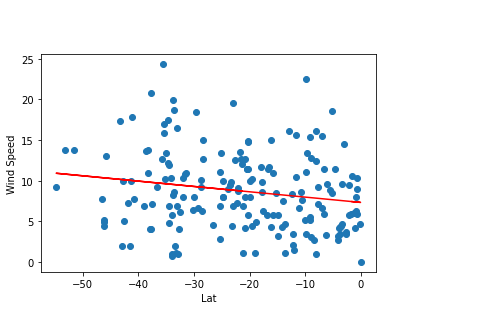

In [100]:
xlbl = "Lat"
ylbl = "Wind Speed"
lblpos = (0,30)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,11)

In [ ]:
#Observations
#Temperature correlates well with the latitude. As latitude moves away from equator, temperature also decreases
#Even though there is very little correlation between wind speed and latitude, wind speed tends to be higher near arctic and antarctic
#It seems that there is no correlation between humidity and latitude
